# Split GLIMS into GTNG Glacier Regions
Author: Ann Windnagel

Date: 3/3/2019

This notebook splits the one large GLIMS shapefile into 19 different shapefiles based on the 19 GTNG Glacier Regions. This will allow for the comparison of GLIMS to the RGI data which came already separated into the 19 regions.

In [1]:
import os
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import sys

import geopandas as gpd
from shapely.geometry import mapping, box
from shapely.geometry import Point, Polygon

import earthpy as et
import earthpy.spatial as es
import earthpy.clip as cl

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

In [2]:
# Open GLIMS polygons using geopandas
glims_file_path = "data/glims/raw/glims_download_20190304/glims_polygons.shp"
glims_polygons = gpd.read_file(glims_file_path)
#glims_polygons.head()

In [3]:
# Open cleaned GTN-G region shapefile
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)
glacier_regions

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
2,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
3,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
4,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
5,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
6,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
7,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
8,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."
9,"Asia, North",10,ASN,"POLYGON ((128 46, 127.000000000178 46, 125.999..."


In [4]:
# Create a list with all the region names
region_names = ["Alaska", "Western Canada and USA",
                "Arctic Canada, North", "Arctic Canada, South",
                "Greenland Periphery", "Iceland", "Svalbard and Jan Mayen",
                "Scandinavia", "Russian Arctic", "Asia, North", "Central Europe",
                "Caucasus and Middle East", "Asia, Central", "Asia, South West",
                "Asia, South East", "Low Latitudes", "Southern Andes", "New Zealand", 
                "Antarctic and Subantarctic"]

In [5]:
# Split glims into all the regions
for counter, region_name in enumerate(region_names):
    region_fp = "data/glims/processed/glims_region_" + str(counter+1) + ".shp"
    if os.path.exists(region_fp) == False:
        print(region_name)
        ws.split_glims(glims_polygons, glacier_regions, region_name, region_fp)

## Extra Code

## Check new region files

In [7]:
# Set a few regions to plot 
# Region 1 - Alaska
region_1 = glacier_regions[glacier_regions.FULL_NAME == region_names[0]]
region_2 = glacier_regions[glacier_regions.FULL_NAME == region_names[1]]
region_11 = glacier_regions[glacier_regions.FULL_NAME == region_names[10]]
region_17 = glacier_regions[glacier_regions.FULL_NAME == region_names[16]]

In [8]:
# Open a few files to inspect them
glims_region_1_fp = "data/glims/processed/glims_region_1.shp"
glims_region_2_fp = "data/glims/processed/glims_region_2.shp"
glims_region_11_fp = "data/glims/processed/glims_region_11.shp"
glims_region_17_fp = "data/glims/processed/glims_region_17.shp"

glims_polygons_r1 = gpd.read_file(glims_region_1_fp)
glims_polygons_r2 = gpd.read_file(glims_region_2_fp)
glims_polygons_r11 = gpd.read_file(glims_region_11_fp)
glims_polygons_r17 = gpd.read_file(glims_region_17_fp)

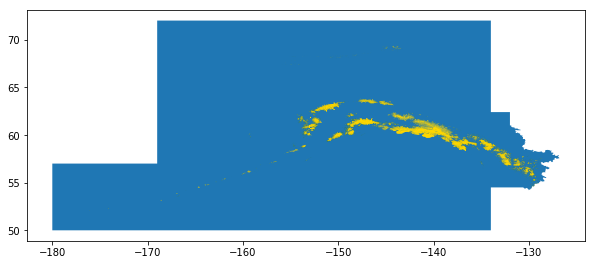

In [9]:
# plot all the glims region 1 outlines in region 1
fig, ax1 = plt.subplots(figsize=(10, 10))
region_1.plot(ax=ax1)
glims_polygons_r1.plot(ax=ax1, color='gold')

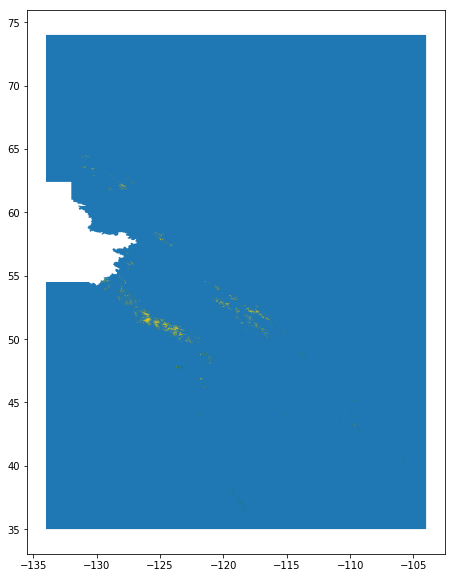

In [10]:
# plot all the glims region 1 outlines in region 1
fig, ax1 = plt.subplots(figsize=(10, 10))
region_2.plot(ax=ax1)
glims_polygons_r2.plot(ax=ax1, color='gold')

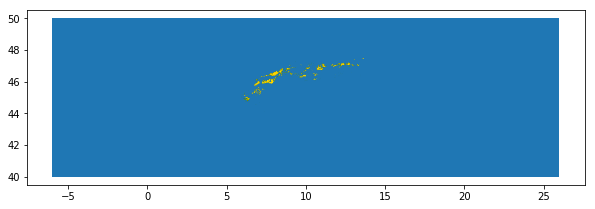

In [11]:
# plot all the glims region 1 outlines in region 1
fig, ax1 = plt.subplots(figsize=(10, 10))
region_11.plot(ax=ax1)
glims_polygons_r11.plot(ax=ax1, color='gold')

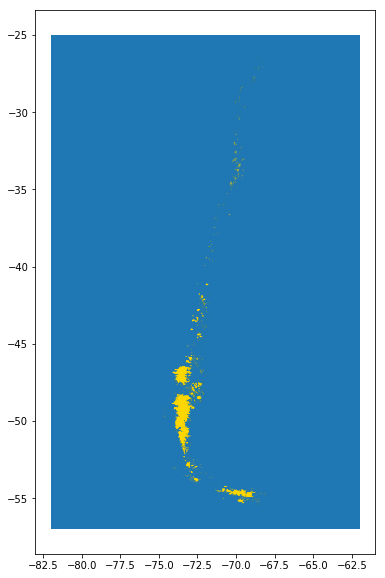

In [12]:
# plot all the glims region 1 outlines in region 1
fig, ax1 = plt.subplots(figsize=(10, 10))
region_17.plot(ax=ax1)
glims_polygons_r17.plot(ax=ax1, color='gold')